# **Importing libraries**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import numpy as np
from matplotlib import rcParams
import seaborn as sns

In [ ]:
import tensorflow as tf 
tf.test.gpu_device_name()

''

In [ ]:
dataset = pd.read_csv("household_power_consumption.csv", skiprows = 0, nrows=150000)
dataset.head()


,Date,Time,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_power
0,16-12-2006,17:24:00,0.418,234.84,18.4,0,1,17.0,4.216
1,16-12-2006,17:25:00,0.436,233.63,23,0,1,16.0,5.36
2,16-12-2006,17:26:00,0.498,233.29,23,0,2,17.0,5.374
3,16-12-2006,17:27:00,0.502,233.74,23,0,1,17.0,5.388
4,16-12-2006,17:28:00,0.528,235.68,15.8,0,1,17.0,3.666


**Data Preprocessing**

In [ ]:
dataset.replace("?", np.nan, inplace = True)

In [ ]:
dataset.shape

(150000, 9)

In [ ]:
#Presents the number of non null values in each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   150000 non-null  object 
 1   Time                   150000 non-null  object 
 2   Global_reactive_power  149991 non-null  object 
 3   Voltage                149991 non-null  object 
 4   Global_intensity       149991 non-null  object 
 5   Sub_metering_1         149991 non-null  object 
 6   Sub_metering_2         149991 non-null  object 
 7   Sub_metering_3         149991 non-null  float64
 8   Global_active_power    149991 non-null  object 
dtypes: float64(1), object(8)
memory usage: 10.3+ MB


In [ ]:
dataset.count()

Date                     150000
Time                     150000
Global_reactive_power    149991
Voltage                  149991
Global_intensity         149991
Sub_metering_1           149991
Sub_metering_2           149991
Sub_metering_3           149991
Global_active_power      149991
dtype: int64

In [ ]:
#Printing datatype of elements in dataframe
dataset.dtypes


Date                      object
Time                      object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
Global_active_power       object
dtype: object

In [ ]:
#Converting all the datatypes from python objects to floats for missing value computation
dataset['Global_reactive_power'] = pd.to_numeric(dataset['Global_reactive_power'],errors = 'coerce')
dataset['Voltage'] = pd.to_numeric(dataset['Voltage'],errors = 'coerce')
dataset['Global_intensity'] = pd.to_numeric(dataset['Global_intensity'],errors = 'coerce')
dataset['Sub_metering_1'] = pd.to_numeric(dataset['Sub_metering_1'],errors = 'coerce')
dataset['Sub_metering_2'] = pd.to_numeric(dataset['Sub_metering_2'],errors = 'coerce')
dataset['Sub_metering_3'] = pd.to_numeric(dataset['Sub_metering_3'],errors = 'coerce')
dataset['Global_active_power'] = pd.to_numeric(dataset['Global_active_power'],errors = 'coerce')

In [ ]:
#Verifying whether all objects converted to floats
dataset.Sub_metering_2.dtypes

dtype('float64')

In [ ]:
#Boolean value of whether present or absent
dataset_missing = dataset.isna()
dataset_missing.head()

,Date,Time,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_power
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [ ]:
#Computes the sum of all values that is True i.e missing values
dataset_num_of_missing = dataset_missing.sum()
dataset_num_of_missing

Date                     0
Time                     0
Global_reactive_power    9
Voltage                  9
Global_intensity         9
Sub_metering_1           9
Sub_metering_2           9
Sub_metering_3           9
Global_active_power      9
dtype: int64

In [ ]:
#Calculating % of missing values by dividing missing by total length of the dataframe
total = len(dataset)
percentage = (dataset_num_of_missing/total)*100
percentage.round(4)#Rounding to 4 decimal places

Date                     0.000
Time                     0.000
Global_reactive_power    0.006
Voltage                  0.006
Global_intensity         0.006
Sub_metering_1           0.006
Sub_metering_2           0.006
Sub_metering_3           0.006
Global_active_power      0.006
dtype: float64

**Splitting Dataset into input and output variable**

In [ ]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values #Global Active Power

In [ ]:
X

array([['16-12-2006', '17:24:00', 0.418, ..., 0.0, 1.0, 17.0],
       ['16-12-2006', '17:25:00', 0.436, ..., 0.0, 1.0, 16.0],
       ['16-12-2006', '17:26:00', 0.498, ..., 0.0, 2.0, 17.0],
       ...,
       ['30-03-2007', '21:21:00', 0.0, ..., 1.0, 0.0, 17.0],
       ['30-03-2007', '21:22:00', 0.0, ..., 1.0, 0.0, 16.0],
       ['30-03-2007', '21:23:00', 0.0, ..., 1.0, 0.0, 17.0]], dtype=object)

In [ ]:
Y

array([4.216, 5.36 , 5.374, ..., 2.21 , 2.202, 2.216])

In [ ]:
#Using sci-kitlearn to fill the missing values with the mean of that particular column using simple imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,2:8])
X[:,2:8]=imputer.transform(X[: ,2:8])

In [ ]:
#Converting our input numpy array to dataframe to check if the missing values have been computed
X_set = pd.DataFrame(X[:,2:8],columns=['Global_reactive','Voltage','Global_Intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3'])

In [ ]:
#percentage down to 0 as all missing values filled
X_set.isna().mean().round(4) * 100

Global_reactive     0.0
Voltage             0.0
Global_Intensity    0.0
Sub_metering_1      0.0
Sub_metering_2      0.0
Sub_metering_3      0.0
dtype: float64

In [ ]:
X_set.head()

,Global_reactive,Voltage,Global_Intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.418,234.84,18.4,0,1,17
1,0.436,233.63,23,0,1,16
2,0.498,233.29,23,0,2,17
3,0.502,233.74,23,0,1,17
4,0.528,235.68,15.8,0,1,17


**Visualising the dataset to derive Insights**

In [ ]:
df = pd.read_csv("household_power_consumption.csv", skiprows = 0, nrows=150000)
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
minimum = df['Date'].min()
maximum = df['Date'].max()

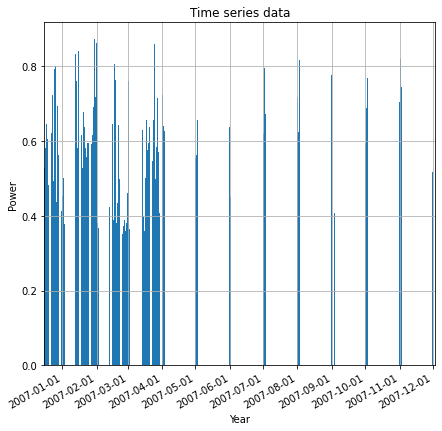

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set(xlabel="Year",
       ylabel="Power",
       title="Time series data", xlim=[minimum , maximum])
ax.bar(df['Date'], X_set['Global_reactive'], align='center')
ax.grid(True)
fig.autofmt_xdate()
plt.show()

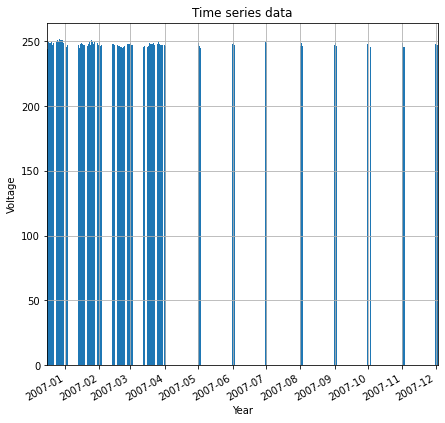

In [ ]:
fig1 = plt.figure(figsize=(7, 7))
bx = fig1.add_subplot()
bx.set(xlabel="Year",
       ylabel="Voltage",
       title="Time series data", xlim=[minimum , maximum])
bx.bar(df['Date'], X_set['Voltage'], align='center')
bx.grid(True)
fig1.autofmt_xdate()
plt.show()

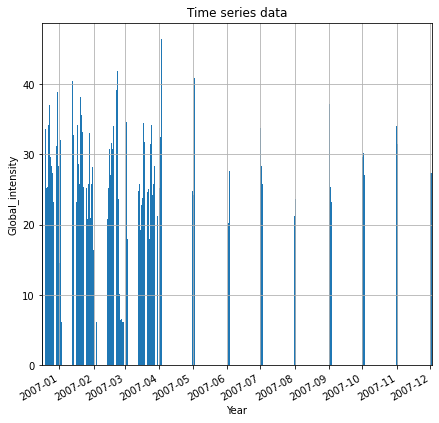

In [ ]:
fig2 = plt.figure(figsize=(7, 7))
cx = fig2.add_subplot()
cx.set(xlabel="Year",
       ylabel="Global_intensity",
       title="Time series data", xlim=[minimum , maximum])
cx.bar(df['Date'], X_set['Global_Intensity'], align='center')
cx.grid(True)
fig2.autofmt_xdate()
plt.show()

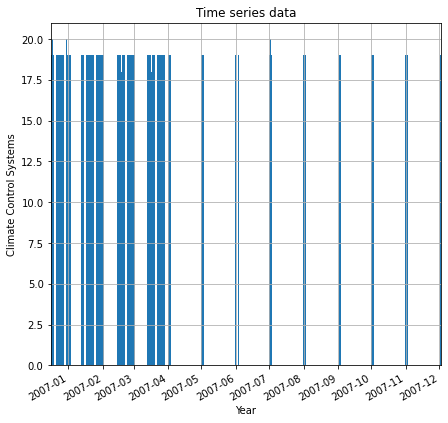

In [ ]:
fig4 = plt.figure(figsize=(7, 7))
ex = fig4.add_subplot()
ex.set(xlabel="Year",
       ylabel="Climate Control Systems",
       title="Time series data", xlim=[minimum , maximum])
ex.bar(df['Date'], X_set['Sub_metering_3'], align='center')
ex.grid(True)
fig4.autofmt_xdate()
plt.show()

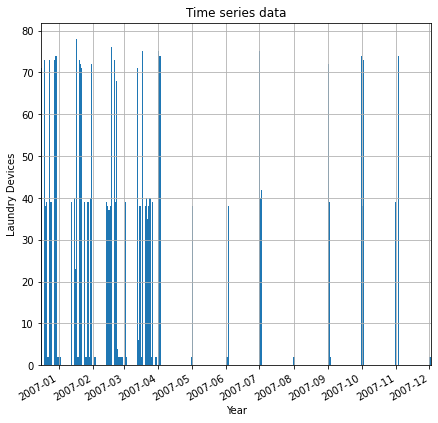

In [ ]:
fig5 = plt.figure(figsize=(7, 7))
fx = fig5.add_subplot()
fx.set(xlabel="Year",
       ylabel="Laundry Devices",
       title="Time series data", xlim=[minimum , maximum])
fx.bar(df['Date'], X_set['Sub_metering_2'], align='center')
fx.grid(True)
fig5.autofmt_xdate()
plt.show()

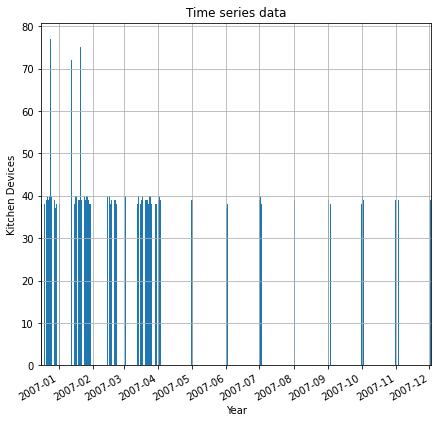

In [ ]:
fig6 = plt.figure(figsize=(7, 7))
gx = fig6.add_subplot()
gx.set(xlabel="Year",
       ylabel="Kitchen Devices",
       title="Time series data", xlim=[minimum , maximum])
gx.bar(df['Date'], X_set['Sub_metering_1'], align='center')
gx.grid(True)
fig6.autofmt_xdate()
plt.show()

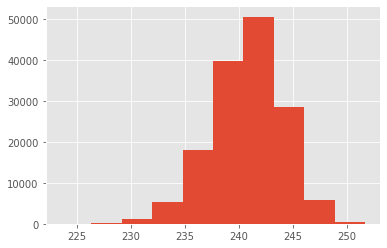

In [ ]:
#histogram used to plot and analyse voltage VS number of entries
plt.style.use('ggplot')
dataset['Voltage'].hist()

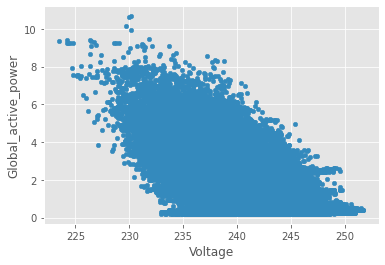

In [ ]:
#scatter plot that brings out a relation between Voltage and Global actv power
dataset.plot.scatter(x='Voltage',y='Global_active_power',cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


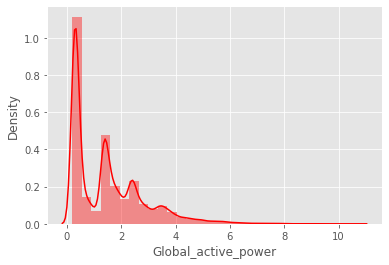

In [ ]:
sns.distplot(dataset['Global_active_power'],bins=30,kde=True,color='red')

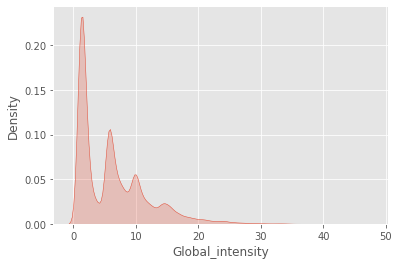

In [ ]:
sns.kdeplot(dataset['Global_intensity'],shade=True)

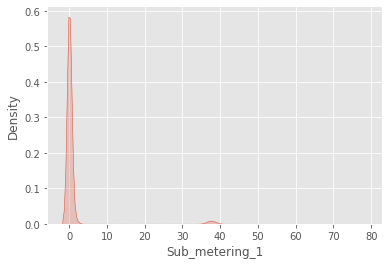

In [ ]:
sns.kdeplot(dataset['Sub_metering_1'],shade=True)

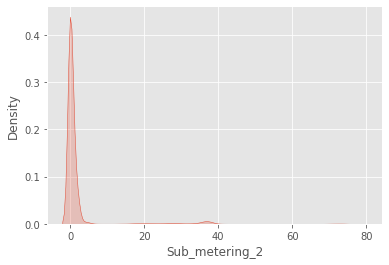

In [ ]:
sns.kdeplot(dataset['Sub_metering_2'],shade=True)

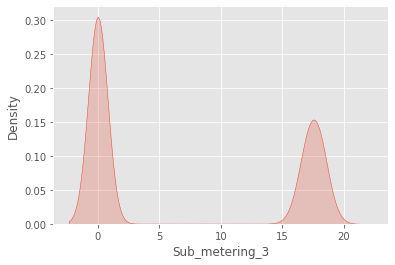

In [ ]:
sns.kdeplot(dataset['Sub_metering_3'],shade=True)